In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from image_extractor import preprocess_hsv, seperate_chanel, statistic_analysis, init_lut, linear_fn, curved, geometry_analysis

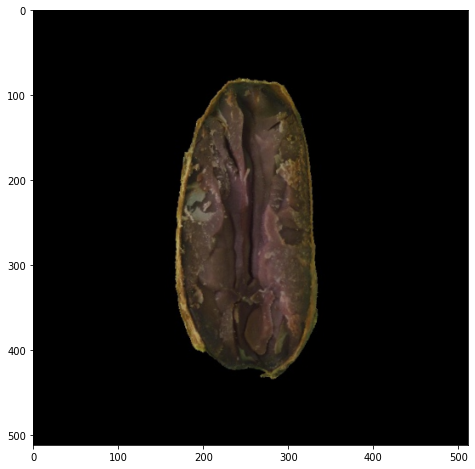

In [24]:
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (2).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (87).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (100).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_White/image (23).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_White/image (72).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Slaty/image (71).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'
# image_dir = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Brittle/image (44).JPG'
image_dir = '/Users/lochuynhquang/Desktop/Color_Corrected_512x512/Compartmentalized_Purple/image (94).JPG'


# plt.rcParams['figure.dpi'] = 102.46
plt.rcParams["figure.figsize"] = (8,8)
lut1 = init_lut(fn=linear_fn, coefficient=15)
lut2 = init_lut(fn=curved, coefficient=1.5)

image = cv2.imread(image_dir)
image_hsv , cnt, ell, im3= preprocess_hsv(image, lut1, lut2, Contour=True, origin_bgr=True)
image_rgb = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
image_rgb = np.asarray(image_rgb, dtype=np.uint8)
plt.imshow(image_rgb)
plt.show()

plt.imsave('/Users/lochuynhquang/Library/Mobile Documents/com~apple~CloudDocs/Study/Sem 2 nam 4/Thesis/ori.png',image_rgb)

In [25]:
x,y,w,h = cv2.boundingRect(cnt)
convexHull = cv2.convexHull(cnt)
convex_area = cv2.contourArea(convexHull)
perimeter = cv2.arcLength(cnt,True)
(centerXCoordinate, centerYCoordinate), eq_radius = cv2.minEnclosingCircle(cnt)
(eX, eY), (alX, alY), orientation = ell
foci_distance = np.sqrt((alX/2)**2 + (alY/2)**2)
ellipse_eccentricity = max(alX, alY)/foci_distance
moment = cv2.moments(cnt)
real_area = moment['m00']
centroidXCoordinate = int(moment['m10'] / real_area)
centroidYCoordinate = int(moment['m01'] / real_area)

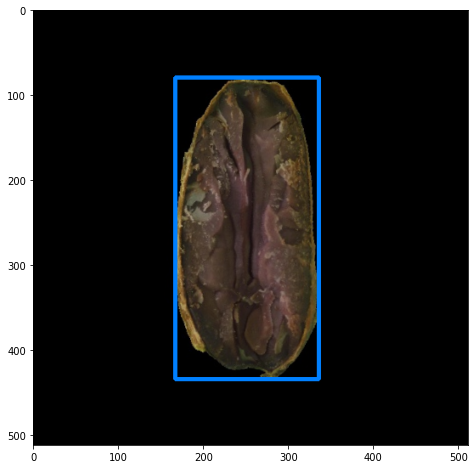

In [26]:
image_rgb = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 128, 255), 3)
plt.imshow(image_rgb)
plt.show()
plt.imsave('/Users/lochuynhquang/Library/Mobile Documents/com~apple~CloudDocs/Study/Sem 2 nam 4/Thesis/bbox.png',image_rgb)

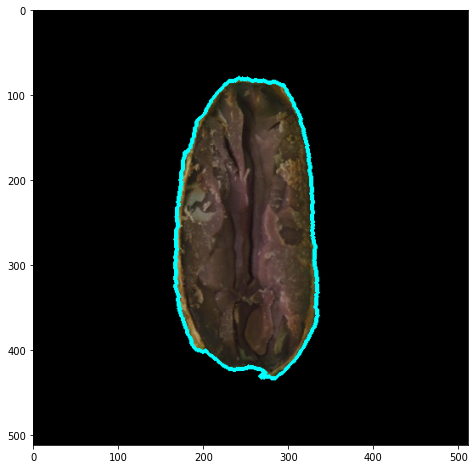

In [27]:
image_rgb = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

cv2.drawContours(image_rgb, [cnt], 0,color=(0,255,255),thickness=3)
plt.imshow(image_rgb)
plt.show()
plt.imsave('/Users/lochuynhquang/Library/Mobile Documents/com~apple~CloudDocs/Study/Sem 2 nam 4/Thesis/cnt.png',image_rgb)

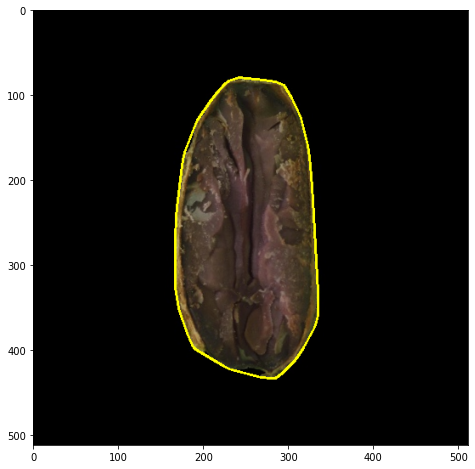

In [28]:
image_rgb = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

cv2.drawContours(image_rgb, [convexHull], -1, (255,255,0),2)
plt.imshow(image_rgb)
plt.show()
plt.imsave('/Users/lochuynhquang/Library/Mobile Documents/com~apple~CloudDocs/Study/Sem 2 nam 4/Thesis/cnvhull.png',image_rgb)

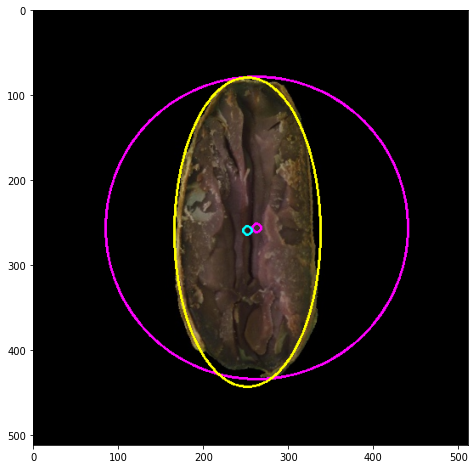

In [29]:
from math import floor
image_rgb = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

cv2.circle(image_rgb, (floor(centerXCoordinate),floor(centerYCoordinate)),5,(255,0,255),2)
cv2.circle(image_rgb, (floor(centerXCoordinate),floor(centerYCoordinate)),floor(eq_radius),(255,0,255),2)
cv2.ellipse(image_rgb,center=(floor(eX),floor(eY)),axes=(floor(alX/2),floor(alY/2)),angle= 0, startAngle=0, endAngle=360,color=(255,255,0),thickness= 2)
cv2.circle(image_rgb, (floor(centroidXCoordinate),floor(centroidYCoordinate)),5,(0,255,255),2)

plt.imshow(image_rgb)
plt.show()
plt.imsave('/Users/lochuynhquang/Library/Mobile Documents/com~apple~CloudDocs/Study/Sem 2 nam 4/Thesis/cir_ell.png',image_rgb)